In [4]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [5]:
import CPTAC

Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******


In [7]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

In [8]:
gene = 'PTEN'
protList = ['PTEN']

pcutoff = 0.05/len(protList)
print(pcutoff)

genedf = somatic_mutations[gene].to_frame()
for protein in protList:
    if protein in proteomics.columns:
        proteindf = proteomics[protein].to_frame()
        proteinfindName = protein + "protein"
        proteindf.columns = [proteinfindName]
        cross = genedf.add(proteindf, fill_value=0).dropna(axis=0)
        mutated = cross.loc[cross[gene] == 1.0]
        wt = cross.loc[cross[gene] == 0.0]
        ttest = scipy.stats.ttest_ind(mutated[proteinfindName], wt[proteinfindName])
        print("Test for " + protein + ": ")
        print(ttest)

0.05
Test for PTEN: 
Ttest_indResult(statistic=-2.747313953385987, pvalue=0.007151900902620795)


[Text(0, 0.5, 'Proteomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

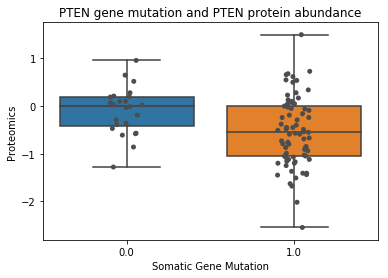

In [9]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=proteinfindName)
somatic_boxplot.set_title(gene + " gene mutation and " + protList[0] + " protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=proteinfindName,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")

Analyze the protein abundance of PIK3CA with and without mutation 

In [12]:
gene = 'PIK3CA'
protList = ['PIK3CA']

pcutoff = 0.05/len(protList)
print(pcutoff)

genedf = somatic_mutations[gene].to_frame()
for protein in protList:
    if protein in proteomics.columns:
        proteindf = proteomics[protein].to_frame()
        proteinfindName = protein + "protein"
        proteindf.columns = [proteinfindName]
        cross = genedf.add(proteindf, fill_value=0).dropna(axis=0)
        mutated = cross.loc[cross[gene] == 1.0]
        print(mutated[proteinfindName])
        wt = cross.loc[cross[gene] == 0.0]
        ttest = scipy.stats.ttest_ind(mutated[proteinfindName], wt[proteinfindName])
        print("Test for " + protein + ": ")
        print(ttest)

0.05
S001   -0.51
S003   -0.20
S008    0.27
S011   -0.79
S013   -0.27
S017   -0.54
S020   -0.64
S021   -0.61
S022   -0.76
S023   -0.47
S026   -0.69
S027    0.61
S030    0.24
S031   -0.27
S032   -0.30
S037   -0.66
S039    0.05
S042    0.50
S051   -0.07
S053   -0.42
S058   -0.04
S059   -0.47
S061   -0.24
S062   -0.55
S063   -0.39
S064    0.21
S065   -0.26
S066   -0.81
S068   -0.51
S072   -0.16
S073   -0.32
S075   -0.14
S082   -0.16
S084   -0.69
S086   -0.40
S087   -0.27
S092    0.02
S093    0.21
S094    0.20
S095   -0.41
S096   -0.69
S100    0.67
Name: PIK3CAprotein, dtype: float64
Test for PIK3CA: 
Ttest_indResult(statistic=-2.3709474235794348, pvalue=0.019698800138688424)


[Text(0, 0.5, 'Proteomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

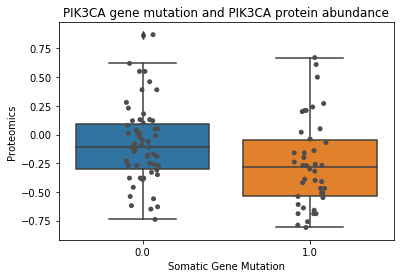

In [52]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=proteinfindName)
somatic_boxplot.set_title(gene + " gene mutation and " + protList[0] + " protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=proteinfindName,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")

Exploring other protein abundances

In [120]:
gene = 'PIK3CA'
protList = ['PIP3']

pcutoff = 0.05/len(protList)
print(pcutoff)

genedf = somatic_mutations[gene].to_frame()
for protein in protList:
    if protein in proteomics.columns:
        proteindf = proteomics[protein].to_frame()
        proteinfindName = protein + "protein"
        proteindf.columns = [proteinfindName]
        cross = genedf.add(proteindf, fill_value=0).dropna(axis=0)
        mutated = cross.loc[cross[gene] == 1.0]
        wt = cross.loc[cross[gene] == 0.0]
        ttest = scipy.stats.ttest_ind(mutated[proteinfindName], wt[proteinfindName])
        print("Test for " + protein + ": ")
        print(ttest)

0.05


[Text(0, 0.5, 'Proteomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

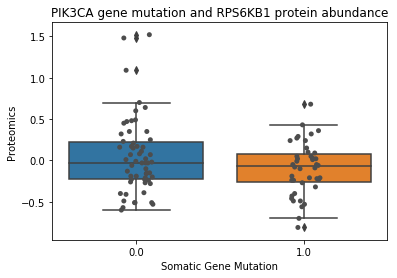

In [90]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=proteinfindName)
somatic_boxplot.set_title(gene + " gene mutation and " + protList[0] + " protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=proteinfindName,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")

Phosphorylation Levels

In [53]:
phosProt = phos.filter(regex='PIK3CA') 
protein = 'PIK3CA'

proteindf = proteomics[protein].to_frame()
cross = proteindf.add(phosProt, fill_value=0)

pcutoff = 0.05/len(cross.columns)
print(pcutoff)

for loc in cross.columns:
    if not loc == protein:
        oneSitedf = cross[[loc, protein]].dropna(axis=0)
        pearsonresult = pearsonr(oneSitedf[loc], oneSitedf[protein])
        print("Results for " + loc)
        print(pearsonresult)

0.016666666666666666
Results for PIK3CA-S312
(0.5841703913763756, 1.2823613810717801e-08)
Results for PIK3CA-T313
(0.6038385439463932, 2.4806540164348424e-08)


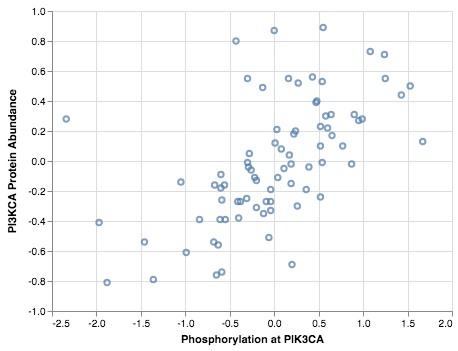

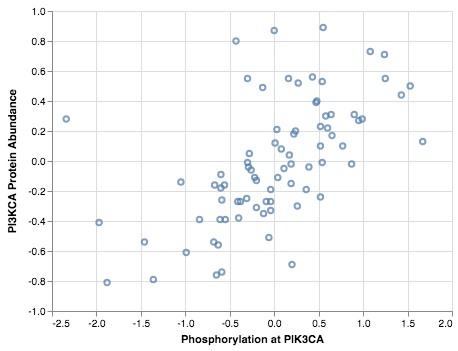

In [60]:
alt.Chart(cross).mark_point().encode(
    alt.X('PIK3CA-S312', type='quantitative', axis=alt.Axis(title="Phosphorylation at PIK3CA")),
    alt.Y('PIK3CA', type='quantitative', axis=alt.Axis(title="PI3KCA Protein Abundance"))
)

In [121]:
phosProt = phos.filter(regex='PIP') 
protein = 'PIK3CA'

proteindf = proteomics[protein].to_frame()
cross = proteindf.add(phosProt, fill_value=0)

pcutoff = 0.05/len(cross.columns)
print(pcutoff)

for loc in cross.columns:
    if not loc == protein:
        oneSitedf = cross[[loc, protein]].dropna(axis=0)
        pearsonresult = pearsonr(oneSitedf[loc], oneSitedf[protein])
        print("Results for " + loc)
        print(pearsonresult)

0.0017857142857142859
Results for APIP-S87
(-0.37392571588681245, 3.0329809432309848e-05)
Results for PIP4K2B-S326
(0.35666548507598267, 5.932438971061893e-05)
Results for PIP4K2B-T322
(0.2777549175397843, 0.0010156401728264098)
Results for PIP4P1-S169
(-0.13843401548245185, 0.1785964070042308)
Results for PIP4P2-T22
(0.07640579484085562, 0.5118170722950167)
Results for PIP5K1A-S71
(0.16582543764424462, 0.1204106261955432)
Results for PPIP5K1-S1037
(-0.1314933823741562, 0.2708880188228978)
Results for PPIP5K1-S1152
(0.5385109337960404, 1.2717295366008121e-06)
Results for PPIP5K1-S944
(0.02568623200861947, 0.7880587429927159)
Results for PPIP5K1-S964
(0.2677902263752017, 0.004678520825464548)
Results for PPIP5K1-S987
(-0.16233397958281087, 0.09480604234330949)
Results for PPIP5K2-S1021
(0.3853125061725585, 0.00022839206665417483)
Results for PPIP5K2-S1031
(0.04768908082879607, 0.6462890466472795)
Results for PPIP5K2-S1106
(-0.20875702913957106, 0.05232752371360207)
Results for PPIP5K2-S

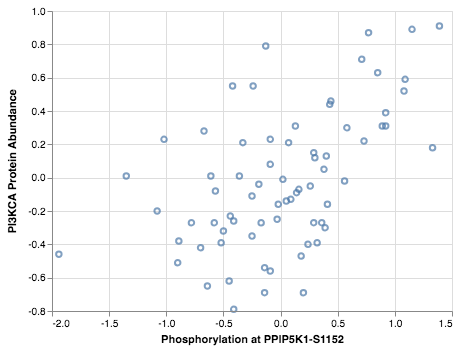

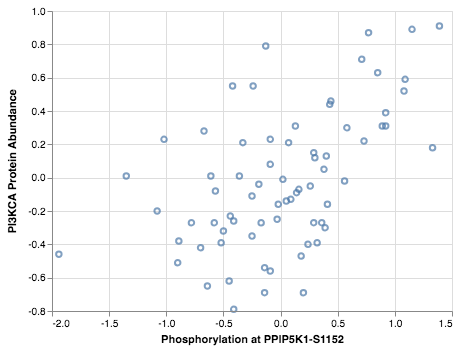

In [126]:
alt.Chart(cross).mark_point().encode(
    alt.X('PPIP5K1-S1152', type='quantitative', axis=alt.Axis(title="Phosphorylation at PPIP5K1-S1152")),
    alt.Y('PIK3CA', type='quantitative', axis=alt.Axis(title="PI3KCA Protein Abundance"))
)

In [135]:
phosProt = phos.filter(regex='RRAS') 
print(phosProt.head())
protein = 'PIK3CA'

proteindf = proteomics[protein].to_frame()
#print(proteindf)
cross = proteindf.add(phosProt, fill_value=0)
#print(cross.head())

pcutoff = 0.05/len(cross.columns)
#print(pcutoff)

for loc in cross.columns:
    if not loc == protein:
        oneSitedf = cross[[loc, protein]].dropna(axis=0)
        pearsonresult = pearsonr(oneSitedf[loc], oneSitedf[protein])
        print("Results for " + loc)
        print(pearsonresult)

idx   RRAS2-S186  RRAS2-T190
S001        0.94        1.19
S002        0.52        0.86
S003        0.55        0.84
S004        0.53        1.06
S005        0.96        0.68
      PIK3CA
S001   -0.51
S002   -0.19
S003   -0.20
S004   -0.65
S005    0.39
S006   -0.15
S007   -0.35
S008    0.27
S009   -0.11
S010   -0.13
S011   -0.79
S012   -0.56
S013   -0.27
S014    0.05
S015    0.23
S016   -0.46
S017   -0.54
S018   -0.27
S019   -0.11
S020   -0.64
S021   -0.61
S022   -0.76
S023   -0.47
S024   -0.26
S025    0.04
S026   -0.69
S027    0.61
S028   -0.31
S029   -0.19
S030    0.24
...      ...
S111    0.79
S112    0.11
S113    0.31
S114    0.27
S115    0.46
S116    0.52
S117    0.59
S118    0.15
S119    0.63
S120    0.80
S121    0.39
S122    0.17
S123    0.22
S124    0.31
S125    0.71
S126    0.10
S127    0.50
S128   -0.02
S129    0.55
S130   -0.01
S131    0.31
S132    0.28
S133    0.23
S134   -0.04
S135    0.18
S136    0.18
S137    0.44
S138    0.47
S139    0.89
S140    0.73

[140 rows x 1 colum

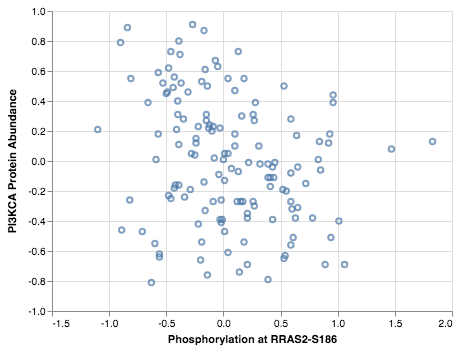

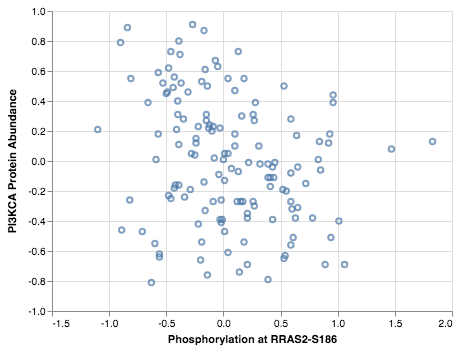

In [129]:
alt.Chart(cross).mark_point().encode(
    alt.X('RRAS2-S186', type='quantitative', axis=alt.Axis(title="Phosphorylation at RRAS2-S186")),
    alt.Y('PIK3CA', type='quantitative', axis=alt.Axis(title="PI3KCA Protein Abundance"))
)

In [140]:
phosProt = phos.filter(regex='AKT1') 
protein = 'PIK3CA'

proteindf = proteomics[protein].to_frame()
cross = proteindf.add(phosProt, fill_value=0)

pcutoff = 0.05/len(cross.columns)
print(pcutoff)

for loc in cross.columns:
    if not loc == protein:
        oneSitedf = cross[[loc, protein]].dropna(axis=0)
        pearsonresult = pearsonr(oneSitedf[loc], oneSitedf[protein])
        print("Results for " + loc)
        print(pearsonresult)
        

0.0038461538461538464
Results for AKT1-S124
(0.44233745395050517, 3.3760464161731936e-07)
Results for AKT1-S126
(0.506171945458734, 6.932688175934594e-10)
Results for AKT1-S129
(0.37671880854619644, 9.210094942671641e-06)
Results for AKT1S1-S108
(-0.2783120702347469, 0.0012325577810268333)
Results for AKT1S1-S112
(-0.2883408445834993, 0.0008383606376134754)
Results for AKT1S1-S203
(0.297404960340632, 0.005421137413520446)
Results for AKT1S1-S222
(0.09930977333878098, 0.24476872329117264)
Results for AKT1S1-S223
(-0.0010109033947890951, 0.990542149574253)
Results for AKT1S1-S231
(-0.14008773211485318, 0.11621615302916113)
Results for AKT1S1-S232
(-0.1632930855511962, 0.0623791223684186)
Results for AKT1S1-T110
(0.008937673979429447, 0.9349064783607377)
Results for AKT1S1-T266
(-0.11479379549043883, 0.20801127205981731)


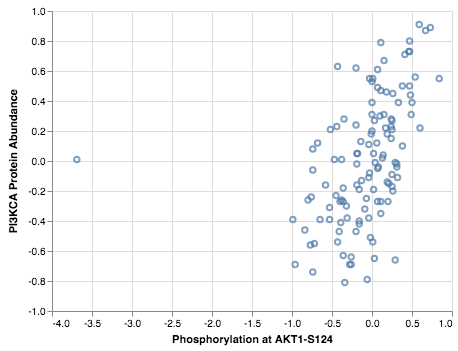

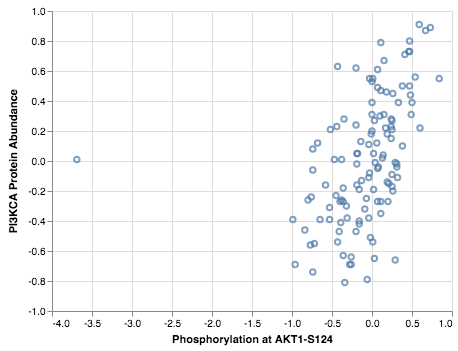

In [144]:
alt.Chart(cross).mark_point().encode(
    alt.X('AKT1-S124', type='quantitative', axis=alt.Axis(title="Phosphorylation at AKT1-S124")),
    alt.Y('PIK3CA', type='quantitative', axis=alt.Axis(title="PI3KCA Protein Abundance"))
)

In [148]:
phosProt = phos.filter(regex='RPS6K') 
protein = 'PIK3CA'

proteindf = proteomics[protein].to_frame()
cross = proteindf.add(phosProt, fill_value=0)

pcutoff = 0.05/len(cross.columns)
print(pcutoff)

for loc in cross.columns:
    if not loc == protein:
        oneSitedf = cross[[loc, protein]].dropna(axis=0)
        pearsonresult = pearsonr(oneSitedf[loc], oneSitedf[protein])
        print("Results for " + loc)
        print(pearsonresult)

0.001388888888888889
Results for RPS6KA1-S230
(0.16078475560466113, 0.07811070559695428)
Results for RPS6KA1-S372
(-0.172943872895866, 0.04101510181164821)
Results for RPS6KA1-S389
(-0.27732211978549953, 0.002941798567744107)
Results for RPS6KA1-S696
(-0.2878810602179969, 0.012262014366626856)
Results for RPS6KA1-T234
(0.34730622514775694, 9.503764213378541e-05)
Results for RPS6KA3-S19
(0.3969600598106951, 0.0001542580959266444)
Results for RPS6KA3-S369
(0.2949305324175205, 0.00040408944617143324)
Results for RPS6KA3-S375
(0.48075763707769814, 2.4408529961542396e-06)
Results for RPS6KA3-S415
(0.20504036886687615, 0.018807715751008217)
Results for RPS6KA3-T365
(0.47905543427939573, 2.3448009092812328e-07)
Results for RPS6KA4-S343
(0.19440256228537284, 0.02183656653496465)
Results for RPS6KA4-S347
(0.17372942395162724, 0.04009176111833914)
Results for RPS6KA4-S681
(0.3080034089733258, 0.004135052580073303)
Results for RPS6KA4-S682
(0.4287785277896971, 1.3926498440618326e-07)
Results for 